In [ ]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import tensorflow as tf
#import tensorflow.keras.backend as K
#from sklearn.metrics import confusion_matrix
from keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
#from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
#from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import MaxPool2D
import tensorflow.keras.metrics as Metrics

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import itertools
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
from google.colab import files #add .json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
import zipfile
import os
from kaggle.cli import main
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d harshart/balanced-plant-dataset

 98% 1.14G/1.17G [00:09<00:00, 116MB/s]
100% 1.17G/1.17G [00:10<00:00, 125MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('balanced-plant-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
filepath = '/content/my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

callbacks = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                     monitor='val_loss',
                                     verbose=1,
                                     save_best_only=True,
                                     save_weights_only=False,
                                     mode='auto',
                                     save_freq='epoch')

# **Grape**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_g_dir = data_dir + "/Training/Grape"
test_g_dir = data_dir + "/Testing/Grape"

In [ ]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_g_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_g_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_g_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 7222 files belonging to 4 classes.
Using 5778 files for training.
Found 7222 files belonging to 4 classes.
Using 1444 files for validation.
Found 1805 files belonging to 4 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
#average pooling
#accuracy 90.63 with 16
#accuracy 95.56 with 16 with 1 more convo


#from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D

def define_g_a():
  grape_avg = models.Sequential()
  grape_avg = Sequential()

  grape_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  grape_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  grape_avg.add(BatchNormalization())

  grape_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  grape_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  grape_avg.add(BatchNormalization())

  grape_avg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  grape_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  grape_avg.add(BatchNormalization())

  avg1 = tf.keras.layers.GlobalAveragePooling2D()(grape_avg.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(4, activation='softmax')(class1)
  grape_avg = Model(inputs=grape_avg.inputs, outputs=output)
  return grape_avg

In [ ]:
grape_avg = define_g_a()
grape_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
grape_avg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 64, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0     

In [ ]:
%%time
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set)
# fit model
history = grape_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, callbacks = callbacks, epochs=epochs, verbose=1)

Epoch 1/20
181/181 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.8570
Epoch 1: val_loss improved from inf to 5.29130, saving model to /content/my_best_model.epoch01-loss5.29.hdf5
181/181 [==============================] - 19s 41ms/step - loss: 0.4211 - accuracy: 0.8570 - val_loss: 5.2913 - val_accuracy: 0.2445
Epoch 2/20
180/181 [============================>.] - ETA: 0s - loss: 0.1980 - accuracy: 0.9330
Epoch 2: val_loss did not improve from 5.29130
181/181 [==============================] - 9s 45ms/step - loss: 0.1981 - accuracy: 0.9328 - val_loss: 6.6821 - val_accuracy: 0.4543
Epoch 3/20
179/181 [============================>.] - ETA: 0s - loss: 0.1294 - accuracy: 0.9560
Epoch 3: val_loss improved from 5.29130 to 1.56099, saving model to /content/my_best_model.epoch03-loss1.56.hdf5
181/181 [==============================] - 8s 41ms/step - loss: 0.1293 - accuracy: 0.9560 - val_loss: 1.5610 - val_accuracy: 0.5436
Epoch 4/20
180/181 [==========================

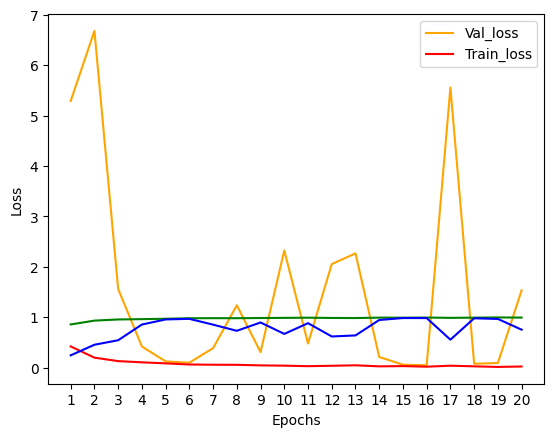

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'])
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(e,labels)
plt.show()

In [ ]:
grape_model = tf.keras.models.load_model('/content/my_best_model.epoch16-loss0.05.hdf5')

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(grape_model.predict(x),1).numpy())

1/1 [==============================] - 0s 96ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.34 %
Test Accuracy   : 97.67 %
Precision Score : 97.67 %
Recall Score    : 97.67 %


<Figure size 200x200 with 0 Axes>

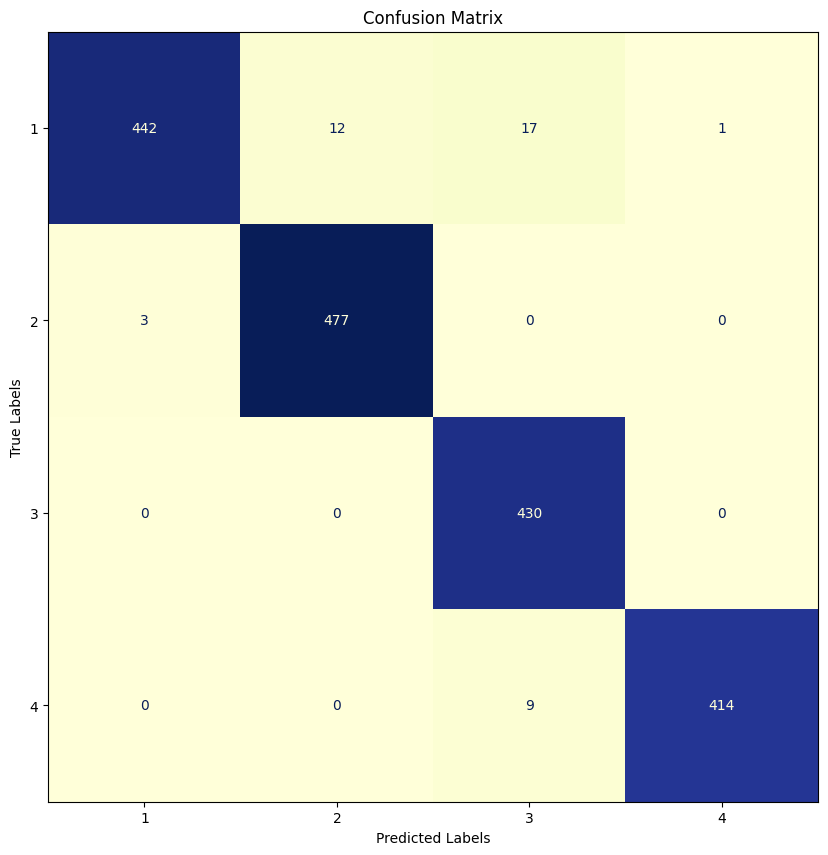

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,5)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
grape_model.save("Grape_Avg_20_Final_97.67.h5")

# **Corn**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_corn_dir = data_dir + "/Training/Corn"
test_corn_dir = data_dir + "/Testing/Corn"

In [ ]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_corn_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_corn_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_corn_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 7316 files belonging to 4 classes.
Using 5853 files for training.
Found 7316 files belonging to 4 classes.
Using 1463 files for validation.
Found 1829 files belonging to 4 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
def define_c_a():
  corn_avg = models.Sequential()
  corn_avg = Sequential()

  corn_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  corn_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  corn_avg.add(BatchNormalization())

  corn_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  corn_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  corn_avg.add(BatchNormalization())

  corn_avg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  corn_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  corn_avg.add(BatchNormalization())

  avg1 = tf.keras.layers.GlobalAveragePooling2D()(corn_avg.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(4, activation='softmax')(class1)
  corn_avg = Model(inputs=corn_avg.inputs, outputs=output)
  return corn_avg

In [ ]:
corn_avg = define_c_a()
corn_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
corn_avg.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_12 (Ba  (None, 64, 64, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 32)        4640      
                                                           

In [ ]:
epochsteps=len(train_set);epochs=20;valsteps=len(valid_set)
# fit model
history = corn_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=20, callbacks = callbacks, verbose=1)

Epoch 1/20
180/183 [============================>.] - ETA: 0s - loss: 0.2980 - accuracy: 0.8946
Epoch 1: val_loss improved from inf to 1.21260, saving model to /content/my_best_model.epoch01-loss1.21.hdf5
183/183 [==============================] - 10s 37ms/step - loss: 0.2952 - accuracy: 0.8958 - val_loss: 1.2126 - val_accuracy: 0.4607
Epoch 2/20
181/183 [============================>.] - ETA: 0s - loss: 0.1553 - accuracy: 0.9434
Epoch 2: val_loss improved from 1.21260 to 0.93524, saving model to /content/my_best_model.epoch02-loss0.94.hdf5
183/183 [==============================] - 6s 32ms/step - loss: 0.1553 - accuracy: 0.9433 - val_loss: 0.9352 - val_accuracy: 0.6794
Epoch 3/20
181/183 [============================>.] - ETA: 0s - loss: 0.1376 - accuracy: 0.9468
Epoch 3: val_loss improved from 0.93524 to 0.40114, saving model to /content/my_best_model.epoch03-loss0.40.hdf5
183/183 [==============================] - 7s 36ms/step - loss: 0.1367 - accuracy: 0.9474 - val_loss: 0.4011 - v

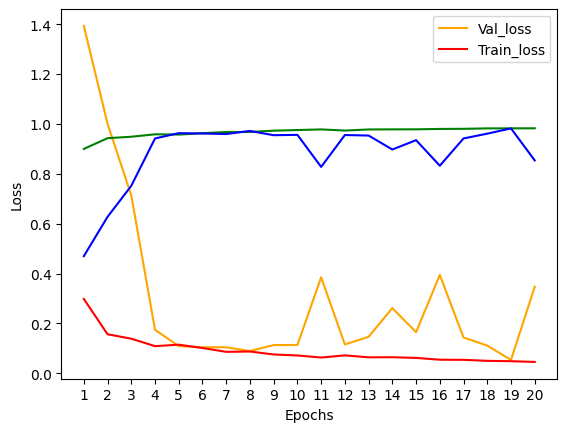

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'])
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(e,labels)
plt.show()

In [ ]:
corn_model = tf.keras.models.load_model('/content/my_best_model.epoch16-loss0.05.hdf5')

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(corn_model.predict(x),1).numpy())

1/1 [==============================] - 0s 96ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.74 %
Test Accuracy   : 97.87 %
Precision Score : 97.87 %
Recall Score    : 97.87 %


<Figure size 200x200 with 0 Axes>

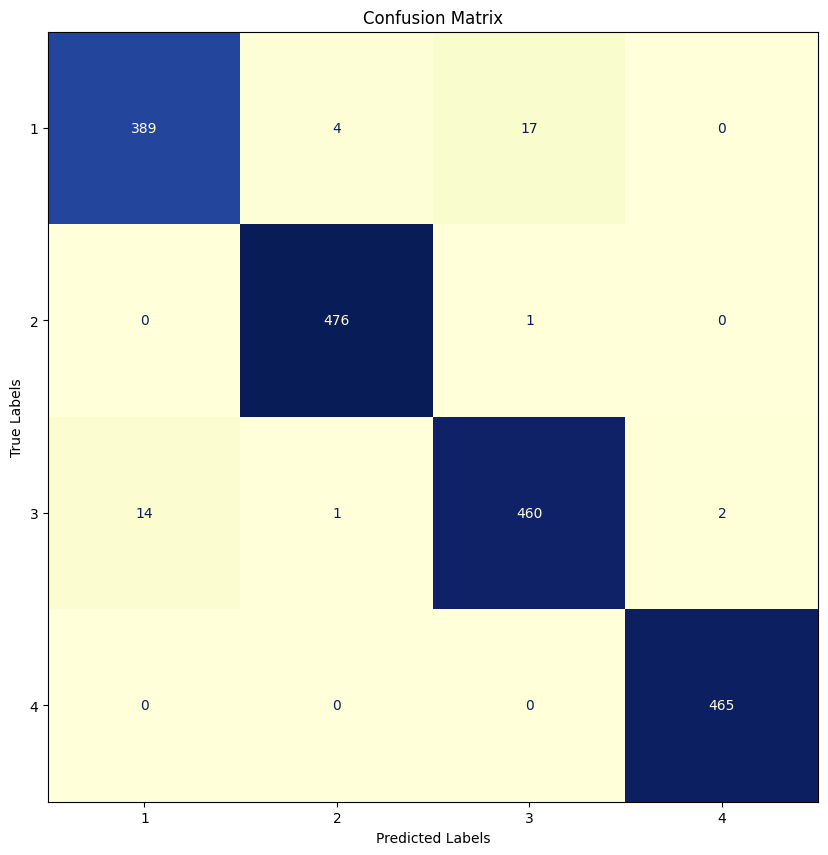

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,5)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
corn_avg.save("Corn_Avg_20_Final_94.37.h5")

# **Tomato**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_t_dir = data_dir + "/Training/Tomato"
test_t_dir = data_dir + "/Testing/Tomato"

In [ ]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_t_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_t_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_t_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 18345 files belonging to 10 classes.
Using 14676 files for training.
Found 18345 files belonging to 10 classes.
Using 3669 files for validation.
Found 4585 files belonging to 10 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
# accuracy = 84.42 with 3 conv2d MaxPool2D layers

def define_t_avg():
  tomato_avg = models.Sequential()
  tomato_avg = Sequential()

  tomato_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  tomato_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  tomato_avg.add(BatchNormalization())

  tomato_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  tomato_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  tomato_avg.add(BatchNormalization())

  tomato_avg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  tomato_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  tomato_avg.add(BatchNormalization())

  avg1 = tf.keras.layers.GlobalAveragePooling2D()(tomato_avg.layers[-1].output)
  class1 = Dense(32, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(10, activation='softmax')(class1)
  tomato_avg = Model(inputs=tomato_avg.inputs, outputs=output)
  return tomato_avg

In [ ]:
tomato_avg = define_t_avg()
tomato_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tomato_avg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 64, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0     

In [ ]:
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set)
# fit model
history = tomato_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=20, callbacks = callbacks, verbose=1)

Epoch 1/20
459/459 [==============================] - ETA: 0s - loss: 0.9762 - accuracy: 0.6817
Epoch 1: val_loss improved from inf to 3.10904, saving model to /content/my_best_model.epoch01-loss3.11.hdf5
459/459 [==============================] - 29s 36ms/step - loss: 0.9762 - accuracy: 0.6817 - val_loss: 3.1090 - val_accuracy: 0.3132
Epoch 2/20
456/459 [============================>.] - ETA: 0s - loss: 0.4819 - accuracy: 0.8472
Epoch 2: val_loss improved from 3.10904 to 0.42207, saving model to /content/my_best_model.epoch02-loss0.42.hdf5
459/459 [==============================] - 19s 41ms/step - loss: 0.4813 - accuracy: 0.8475 - val_loss: 0.4221 - val_accuracy: 0.8692
Epoch 3/20
457/459 [============================>.] - ETA: 0s - loss: 0.3462 - accuracy: 0.8872
Epoch 3: val_loss did not improve from 0.42207
459/459 [==============================] - 16s 35ms/step - loss: 0.3462 - accuracy: 0.8872 - val_loss: 0.5436 - val_accuracy: 0.7999
Epoch 4/20
457/459 [========================

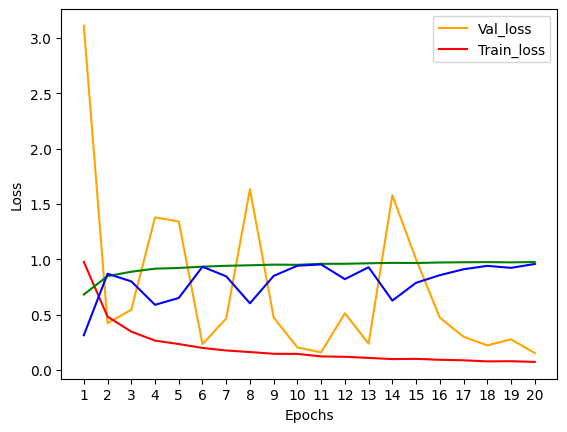

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'])
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(e,labels)
plt.show()

In [ ]:
tomato_model = tf.keras.models.load_model('/content/my_best_model.epoch20-loss0.15.hdf5')

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(tomato_model.predict(x),1).numpy())

1/1 [==============================] - 0s 219ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 97.50 %
Test Accuracy   : 95.03 %
Precision Score : 95.03 %
Recall Score    : 95.03 %


<Figure size 200x200 with 0 Axes>

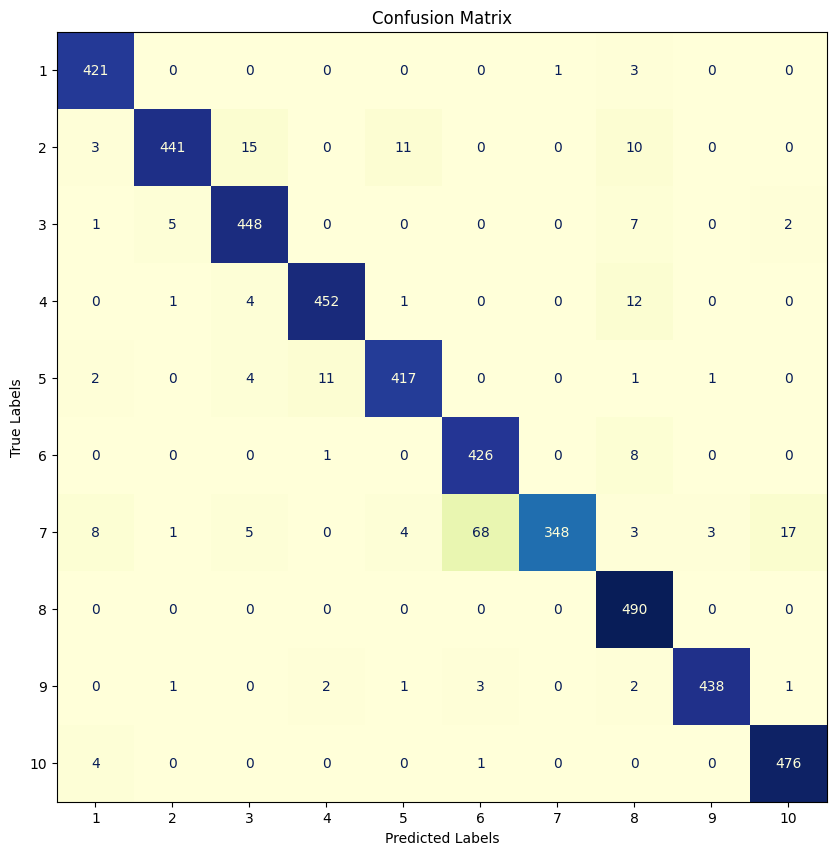

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,11)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
tomato_avg.save("Tomato_Avg_20_Final_90.08.h5")

# **Potato**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_potato_dir = data_dir + "/Training/Potato"
test_potato_dir = data_dir + "/Testing/Potato"


In [ ]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_potato_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_potato_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_potato_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 5702 files belonging to 3 classes.
Using 4562 files for training.
Found 5702 files belonging to 3 classes.
Using 1140 files for validation.
Found 1426 files belonging to 3 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
def define_potato_avg():
  potato_avg = models.Sequential()
  potato_avg = Sequential()

  potato_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  potato_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  potato_avg.add(BatchNormalization())

  potato_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  potato_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  potato_avg.add(BatchNormalization())

  potato_avg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  potato_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  potato_avg.add(BatchNormalization())

  avg1 = tf.keras.layers.GlobalAveragePooling2D()(potato_avg.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(3, activation='softmax')(class1)
  potato_avg = Model(inputs=potato_avg.inputs, outputs=output)
  return potato_avg

In [ ]:
potato_avg = define_potato_avg()
potato_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
potato_avg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer  [(None, 128, 128, 3)]     0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 64, 64, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                           

In [ ]:
%%time
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set)
# fit model
history = potato_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, callbacks= callbacks, verbose=1)

Epoch 1/20
142/143 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.9716
Epoch 1: val_loss did not improve from 0.04640
143/143 [==============================] - 5s 34ms/step - loss: 0.0774 - accuracy: 0.9717 - val_loss: 3.3818 - val_accuracy: 0.3605
Epoch 2/20
140/143 [============================>.] - ETA: 0s - loss: 0.0658 - accuracy: 0.9754
Epoch 2: val_loss did not improve from 0.04640
143/143 [==============================] - 6s 37ms/step - loss: 0.0661 - accuracy: 0.9752 - val_loss: 0.3972 - val_accuracy: 0.8175
Epoch 3/20
140/143 [============================>.] - ETA: 0s - loss: 0.0485 - accuracy: 0.9828
Epoch 3: val_loss did not improve from 0.04640
143/143 [==============================] - 6s 38ms/step - loss: 0.0481 - accuracy: 0.9831 - val_loss: 0.2933 - val_accuracy: 0.9140
Epoch 4/20
142/143 [============================>.] - ETA: 0s - loss: 0.0345 - accuracy: 0.9870
Epoch 4: val_loss did not improve from 0.04640
143/143 [=======================

In [ ]:
potato_model= tf.keras.models.load_model('/content/my_best_model.epoch06-loss0.02.hdf5')

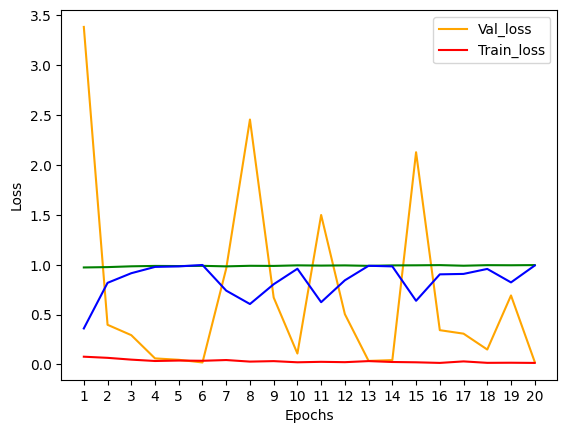

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'])
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(e,labels)
plt.show()

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(potato_model.predict(x),1).numpy())

1/1 [==============================] - 0s 101ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.54 %
Test Accuracy   : 99.58 %
Precision Score : 99.58 %
Recall Score    : 99.58 %


<Figure size 200x200 with 0 Axes>

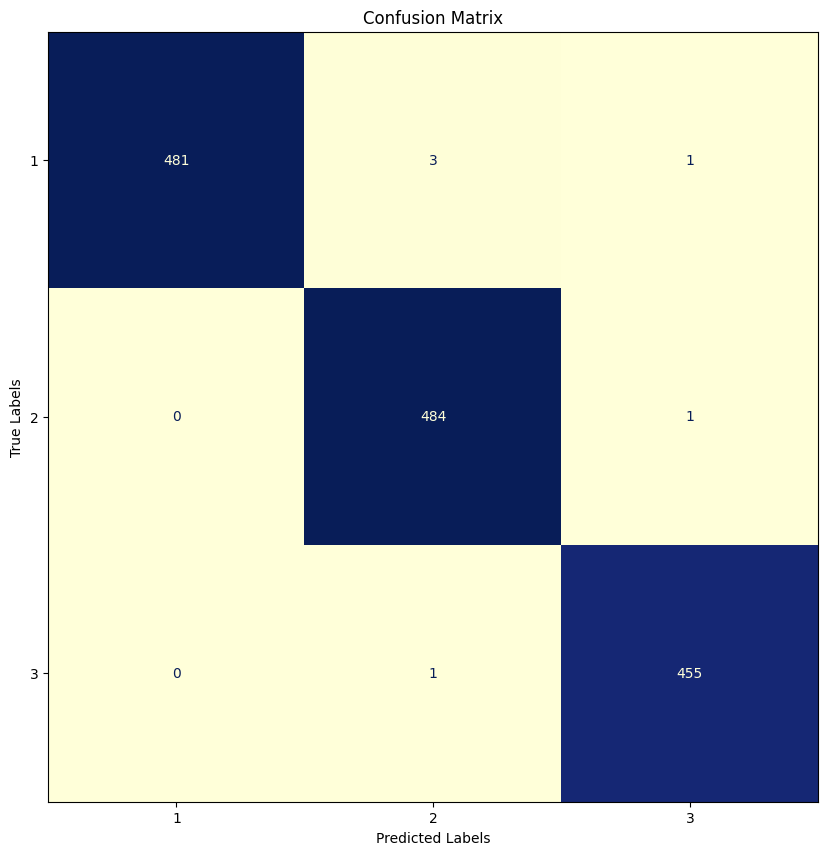

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,4)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
potato_model.save("Potato_Avg_20_Final_99.58.h5")

# **Apple**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_apple_dir = data_dir + "/Training/Apple"
test_apple_dir = data_dir + "/Testing/Apple"

In [ ]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_apple_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_apple_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_apple_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 7771 files belonging to 4 classes.
Using 6217 files for training.
Found 7771 files belonging to 4 classes.
Using 1554 files for validation.
Found 1943 files belonging to 4 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
apple_avg = models.Sequential()
apple_avg = Sequential()

apple_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
apple_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
apple_avg.add(BatchNormalization())

apple_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
apple_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
apple_avg.add(BatchNormalization())

apple_avg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
apple_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
apple_avg.add(BatchNormalization())

avg1 = tf.keras.layers.GlobalAveragePooling2D()(apple_avg.layers[-1].output)
class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
output = Dense(4, activation='softmax')(class1)
apple_avg = Model(inputs=apple_avg.inputs, outputs=output)

In [ ]:
apple_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
apple_avg.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_3 (Bat  (None, 64, 64, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        4640      
                                                           

In [ ]:
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set)
# fit model
history = apple_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=20, verbose=1)

Epoch 1/20
195/195 [==============================] - 9s 33ms/step - loss: 0.3909 - accuracy: 0.8694 - val_loss: 2.5688 - val_accuracy: 0.2960
Epoch 2/20
195/195 [==============================] - 8s 38ms/step - loss: 0.1676 - accuracy: 0.9437 - val_loss: 2.5196 - val_accuracy: 0.4395
Epoch 3/20
195/195 [==============================] - 8s 38ms/step - loss: 0.1167 - accuracy: 0.9609 - val_loss: 0.9938 - val_accuracy: 0.6557
Epoch 4/20
195/195 [==============================] - 6s 31ms/step - loss: 0.0928 - accuracy: 0.9702 - val_loss: 0.2934 - val_accuracy: 0.8951
Epoch 5/20
195/195 [==============================] - 8s 38ms/step - loss: 0.0822 - accuracy: 0.9717 - val_loss: 0.2013 - val_accuracy: 0.9221
Epoch 6/20
195/195 [==============================] - 8s 40ms/step - loss: 0.0596 - accuracy: 0.9802 - val_loss: 0.8092 - val_accuracy: 0.7658
Epoch 7/20
195/195 [==============================] - 7s 33ms/step - loss: 0.0585 - accuracy: 0.9813 - val_loss: 0.9224 - val_accuracy: 0.7162

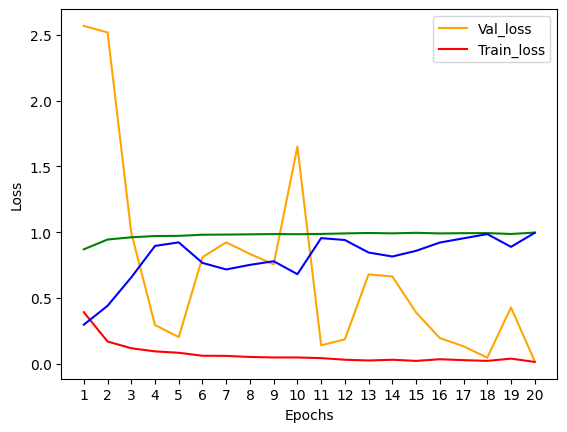

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'])
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(e,labels)
plt.show()

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(apple_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 264ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.65 %
Test Accuracy   : 99.33 %
Precision Score : 99.33 %
Recall Score    : 99.33 %


<Figure size 200x200 with 0 Axes>

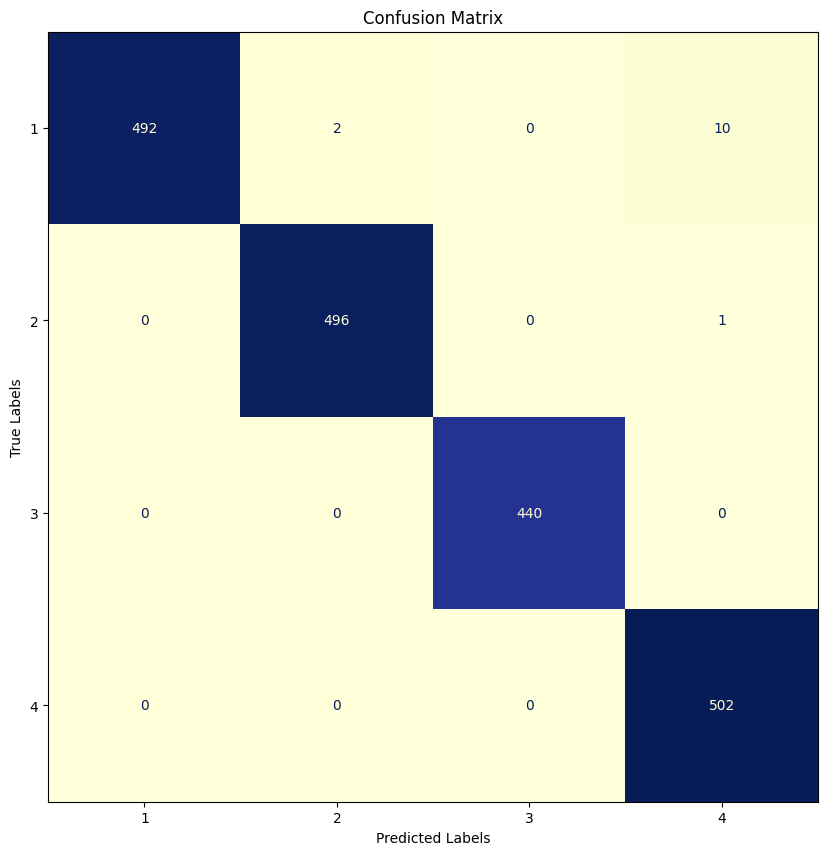

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,5)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
apple_avg.save("Apple_Avg_20_Final_99.3.h5")